# Linear Regression & Gradient Descent

In this notebook we will work with the diabetes dataset 
https://www4.stat.ncsu.edu/~boos/var.select/diabetes.html
https://web.stanford.edu/~hastie/Papers/LARS/diabetes.data (raw data, not standardised)

The data set contains 10 baseline variables (X1, X2, X3....X10) for 442 patients with diabetes: age, sex, body mass index, average blood pressure, and six blood serum measurements. The target variable (y) indicates the progression of the dieases one year after baseline.

Luckily, this database is available in sklearn, so we need only to load it. 
Even more luckily, the sklearn database is already standardised (compare with the raw data above)

In [19]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split

In [20]:
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)

We will consider a subset of the dataset, specifically only the variables: body mass index, average blood pressure and one blood serum measurement. Feel free to include more dimensions in your model. 
As usual insert your code in "####ADD YOUR CODE HERE#####" and answer the questions along the way.

In [21]:
diabetes_X = diabetes_X[:,2:5] #select only the 3 relevant features we want to consider

First thing, we split our dataset in training set and test set (z.B 80 data points are left as a test).
We will fit(train) our model on the training dataset and then we will evaluate how they really perform on test data.
The performance on the test data is fundamental to see how models generalise.

In [22]:
diabetes_X_train = diabetes_X[:-80] #feel free to change 80 to another value, you can also split data using the sklearn function: train_test_split
diabetes_X_test = diabetes_X[-80:]

diabetes_y_train = diabetes_y[:-80]
diabetes_y_test = diabetes_y[-80:]

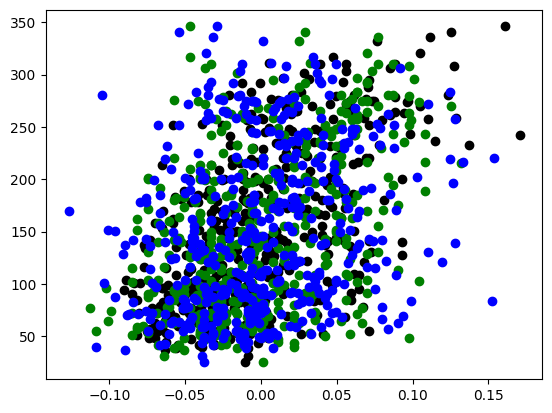

In [23]:
plt.scatter(diabetes_X[:, 0:1], diabetes_y, color = 'black' )
plt.scatter(diabetes_X[:, 1:2], diabetes_y, color = 'green' )
plt.scatter(diabetes_X[:, 2:3], diabetes_y, color = 'blue' )

In this Notebook we want to first compare several methods to determine the best parameters for our model. 
Let's start with the LinearRegression() function from sklearn (https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html).
The LinearRegression class is based on the scipy.linalg.lstsq() function (the name stands for "least squares"), this compute the optimal paramters'values using the least square exact method.

Coefficients (theta_1, theta_2, theta_3, theta_0): 
 805.692327767192 363.7020387241161 52.144503639311466 152.53452637832743
[181.07590522]


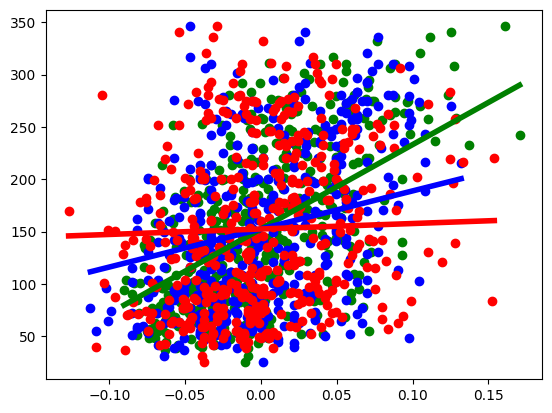

In [24]:
regr = linear_model.LinearRegression()

#Once you defined your model, use the method .fit to fit to the data 
regr.fit(diabetes_X_train, diabetes_y_train)


# The coefficients
print('Coefficients (theta_1, theta_2, theta_3, theta_0): \n', *regr.coef_, regr.intercept_)

def tss(color, datax, datay, intercept, theta):
    x_new = np.linspace(min(datax),max(datax),350)
    y_hyp = theta * x_new + intercept
    plt.plot(x_new, y_hyp, color = color, lw = 4)
    plt.scatter(datax, datay, color = color)

tss('green', diabetes_X[:, 0:1], diabetes_y, regr.intercept_, regr.coef_[0])
tss('blue', diabetes_X[:, 1:2], diabetes_y, regr.intercept_, regr.coef_[1])
tss('red', diabetes_X[:, 2:3], diabetes_y, regr.intercept_, regr.coef_[2])

print(regr.predict([[-0.1,0.3,0]]))

### Batch Gradient Descent

Let's now try to compute the same parameters using the Batch Gradient Descent. 

In [25]:
eta = 0.05  # learning rate, feel free to change
n_iterations = 800000
N = len(diabetes_X)

theta_0 = np.random.randn(1) # random initialization
theta_1 = np.random.randn(1)
theta_2 = np.random.randn(1)
theta_3 = np.random.randn(1)

X1= diabetes_X_train[:,0]
X2= diabetes_X_train[:,1]
X3= diabetes_X_train[:,2]

Code here the formulas for the batch gradient descent (check the lecture slides for reference)

In [26]:
for iteration in range(n_iterations):
    gradient_theta_3 = 1/N * np.sum((theta_0 + theta_1 * X1 + theta_2 * X2 + theta_3 * X3 - diabetes_y_train) * X3)
    gradient_theta_2 = 1/N * np.sum((theta_0 + theta_1 * X1 + theta_2 * X2 + theta_3 * X3 - diabetes_y_train) * X2)
    gradient_theta_1 = 1/N * np.sum((theta_0 + theta_1 * X1 + theta_2 * X2 + theta_3 * X3 - diabetes_y_train) * X1)
    gradient_theta_0 = 1/N * np.sum((theta_0 + theta_1 * X1 + theta_2 * X2 + theta_3 * X3 - diabetes_y_train))
    
    theta_3 = theta_3 - eta * gradient_theta_3
    theta_2 = theta_2 - eta * gradient_theta_2
    theta_1 = theta_1 - eta * gradient_theta_1
    theta_0 = theta_0 - eta * gradient_theta_0

    #print(iteration, gradient_theta_0, theta_0, gradient_theta_1, theta_1)

print(theta_1,theta_2,theta_3, theta_0) 
    

[805.69232777] [363.70203872] [52.14450364] [152.53452638]


In [27]:
#Let's see the parameters look like 
print(theta_1,theta_2,theta_3, theta_0)

[805.69232777] [363.70203872] [52.14450364] [152.53452638]


Compare with the values obtained with the function LinearRegression().
Try to change the number of iterations and/or eta to get closer to those values.

Actually the best thing would be not to compare the parameters itself but the value of the cost function!
Optional: Try to compute in both cases the cost function value. How do they compare?

### Stochastic Gradient Descent
We try now to see how the results change if we use the SGD approach. We use here the sklearn function SGDRegressor.
Check out here the syntax
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDRegressor.html
This function has many parameters, for the moment just focus on the number of iterations and eta.

In [28]:
from sklearn.linear_model import SGDRegressor

In [29]:
sgd_reg = SGDRegressor(learning_rate='adaptive', max_iter=900000, early_stopping=False, tol=None)
sgd_reg.fit(diabetes_X_train, diabetes_y_train)

SGDRegressor(learning_rate='adaptive', max_iter=900000, tol=None)

In [30]:
sgd_reg.coef_, sgd_reg.intercept_

(array([768.78816425, 359.51021706,  60.83746481]), array([152.81509444]))

How does this compare with the previous solutions? Try to adapt also here eta and number of iterations. 
How does it compare in terms of velocity with the Batch Gradient Descent?

Try to run the previous 2 cells again. Do you get always the same result?

### Using a linear regression model

After you found the best parameters for your linear model, you can use them on the test data to predict values and evaluate how well your model perform, that is how much your predictions are off from the true y values of your test data.
Let's start with the model obtained with LinearRegression() and then do the same with the linear regression obtained via SGD. 
How do the 2 compare on the test data?

In [18]:
from sklearn.metrics import mean_squared_error

In [31]:
# complete the code to obtain the model prediction for the test data, e.g. diabetes_X_test
# for both cases, using the .predict method

diabetes_y_pred_EasyLinReg = regr.predict(diabetes_X_test)
diabetes_y_pred_SGD = sgd_reg.predict(diabetes_X_test)

In [32]:
print('LinearRegression() Mean squared error: %.2f' % mean_squared_error(diabetes_y_test, diabetes_y_pred_EasyLinReg))
print('SGD() Mean squared error: %.2f' % mean_squared_error(diabetes_y_test, diabetes_y_pred_SGD))

LinearRegression() Mean squared error: 3327.59
SGD() Mean squared error: 3322.73
